In [1]:
# %matplotlib inline
import yaml
from inspect import getsourcefile
import os.path
import os
os.system('module load gurobipy3')

import sys
import matplotlib
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import argparse
from io import StringIO
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime as DT

import seaborn as sns
# import gurobipy
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parent_dir = os.path.dirname(current_dir)
parent_parent_dir = os.path.dirname(parent_dir)
sys.path.insert(0, parent_parent_dir+"/heuristics")

print(parent_parent_dir+"/heuristics")

# parent_dir = current_dir[:current_dir.rfind(os.path.sep)]
sys.path.insert(0, parent_parent_dir)


from group import SEIR_group, DynamicalModel
import math
import pprint
import pandas as pd
import pickle
import numpy as np
from copy import deepcopy



/usr/local/ifs/projects/daniancu-covid-targets/covid-optimization/heuristics


# Pareto curves and objective as a func of xi

In [3]:
# Modify rewards to losses

T = 104

experiment_params = {
  "T":90,
    "delta_schooling":0.5,
    "eta":0.1,
    "icus":2900.0,
    "lockdown_freq":14,
    "n_a_tests":0,
    "n_m_tests":60000.0,
    "start_day":0,
    "test_freq":7,
    'xi':0.0
    }

# Read group parameters
with open("../../parameters/fitted.yaml") as file:
    universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

# Read econ parameters
with open("../../parameters/econ.yaml") as file:
    econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

start_day = experiment_params["start_day"]


universe_params = universe_params_all
econ_params = econ_params_all

with open("../../initialization/oct21.yaml") as file:
    initialization = yaml.load(file, Loader=yaml.FullLoader)

experiment_params = experiment_params

dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, experiment_params['eta'], extra_data = True)



econ_activities = ["transport","leisure","other"]

V = 0

for age_group in dynModel.age_groups:
    total_initial_population_g = sum([dynModel.initialization[age_group][cat] for cat in ["N","E","I","ICU","Ia","Ims","Ips","Iss","Rq"] ])

#   D: 2.0129755906530393
#   E: 2285.276888763268
#   H: 13.540885275895503
#   I: 2142.166336075084
#   ICU: 3.5669812156992835
#   Ia: 0.0
#   Ims: 0.0
#   Ips: 0.0
#   Iss: 0.0
#   N: 1594534.826129878
#   R: 160265.76119148443
#   Rq: 302.0529959235804
#   S: 1429841.621713554
    # print(f"age group: {age_group}")
    # print(f"Initial Pop: {total_initial_population_g}")
    v_g = sum([dynModel.econ_params["employment_params"]["v"][age_group][activity] for activity in econ_activities])
    
    v_employment_1_g = v_g

    # print(f"employment: {v_g * 365}")

    v_schooling_1_g =  (

        dynModel.experiment_params['delta_schooling']*dynModel.econ_params['schooling_params'][age_group]
    )


    V += (v_employment_1_g + v_schooling_1_g) * T * total_initial_population_g

print(V)

file_name = f"plots/results-Fig1.xlsx"

try:
   df = pd.read_excel(file_name)
except FileNotFoundError:
    print("File Not Found, check file name")

df["economic_losses"] = V/1e9 - df["economics_value"]
df["total_loss"] = V - df["reward"]

df.to_excel(file_name, index=False)

57041993720.71903


## Figure 1

linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
['xi-9671747.799999999', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
Found in results
linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
['xi-5579854.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
Found in results
linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
['xi-33851117.3', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-

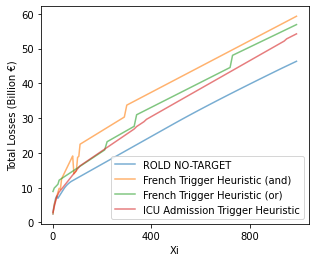

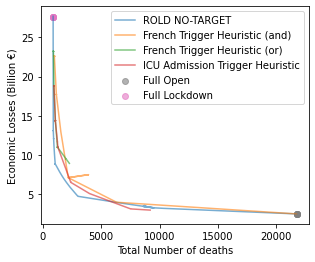

In [4]:

etas = [0.1]
deltas = [0.5]
icus = [2900]
lockdown_freq=14
testing_freq=7
nmtests = [0]
natests = [0]

heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "French_trigger","French_trigger_or","ICU_admissions_trigger","full_open","full_lockdown"]
# ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
# "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
# linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
# ,"dynamic_gradient"]
#  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
#  ["dynamic_gradient"]
# ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
# ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
# ["dynamic_gradient"]
# , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

# xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

fig1, ax1 = plt.subplots(1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis



fig2, ax2 = plt.subplots(1)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])




markers = [".","D","s","*","+","p","x"]
marker = 0

heuristic_labels={}

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"] = "ROLD AGE-ACT"
heuristic_labels["French_trigger"] = "French Trigger Heuristic (and)"
heuristic_labels["French_trigger_or"] = "French Trigger Heuristic (or)"
heuristic_labels["ICU_admissions_trigger"] = "ICU Admission Trigger Heuristic"
heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"] = "ROLD ACT"

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"] = "ROLD AGE"

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"] = "ROLD NO-TARGET"

heuristic_labels["full_lockdown"] = "Full Lockdown"
heuristic_labels["full_open"] = "Full Open"



handles_ax1 = []
handles_ax2 = []

try:
    old_data = pd.read_excel("plots/results-Fig1.xlsx")
except FileNotFoundError:
    old_data = pd.DataFrame([{
                                            "lock_heuristic":"",
                                            "xi":0,
                                            "icus":0,
                                            "n_m_tests":0,
                                            "eta":0,
                                            "economics_value":0,
                                            "deaths":0,
                                            "reward":0,
                                        }])

new_data = []


for h in heurs:
    for e in etas:
        for d in deltas:
            for i in icus:
                for nm in nmtests:
                    for na in natests:
                        all_deaths = []
                        all_econ_values = []
                        all_xis = []
                        all_rewards = []

                        
                        symbols = ["*",".","d","o","s","^"]
                        
                        for file_name in os.listdir(h):
                            instance = file_name.split("_")

                            for p in instance:
                                if "xi" in p:
                                    xi = float(p.split("-")[1])
                    #                 print(xi)
                                if "icus" in p:
                                    icu = float(p.split("-")[1])
                    #                 print(icu)
                                if "natests" in p:
                                    natest = float(p.split("-")[1])
                    #                 print(natest)
                                if "nmtests" in p:
                                    nmtest = float(p.split("-")[1])
                    #                 print(nmtest)
                                if "dschool" in p:
                                    delta = float(p.split("-")[1])
                    #                 print(delta)
                                if "eta" in p:
                                    eta = float(p.split("-")[1])
                    #                 print(eta)
                                if "T" in p:
                                    T = float(p.split("-")[1])
                    #                 print(eta)

                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and T==90:
                                print(h)
                                print(instance)
                                
                                # print(old_data.loc[(old_data["lock_heuristic"] == h) & ((old_data["xi"] <= ((xi/37199.03) + 1)) & (old_data["xi"] >= ((xi/37199.03) - 1))) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["deaths"])

                                if not old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)].empty:

                                    
                                    print("Found in results")
                                    deaths = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["deaths"].item()
                                    econ_value = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["economic_losses"].item()
                                    reward = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["total_loss"].item()
                                    # print(f"reward is {reward}")
                                    # print(f"Econ value rerun: {econ_value}")
                                    # with open("%s/%s"%(h,file_name)) as file:
                                    #     result = yaml.load(file, Loader=yaml.UnsafeLoader)
                                    # print(f"Econ value original: {result['results']['economics_value']/1e9}")
                                    
                                else:


                                    with open("%s/%s"%(h,file_name)) as file:
                                        result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                    # Read group parameters
                                    with open("../../parameters/fitted.yaml") as file:
                                        universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read econ parameters
                                    with open("../../parameters/econ.yaml") as file:
                                        econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read group parameters
                                    with open("../../parameters/one_group_fitted.yaml") as file:
                                        universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read econ parameters
                                    with open("../../parameters/one_group_econ.yaml") as file:
                                        econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                    

                                    start_day = 0

                                    universe_params = universe_params_all
                                    econ_params = econ_params_all

                                    with open("../../initialization/oct21.yaml") as file:
                                        initialization = yaml.load(file, Loader=yaml.FullLoader)
                                    

                                    experiment_params = result["experiment_params"]

                                    dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                    for t in range(experiment_params["T"]):
                                        dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                    dynModel.take_end_steps()

                                    deaths = dynModel.get_total_deaths()
                                    econ_value = (dynModel.get_total_reward() + dynModel.get_total_deaths() * xi) / 1e9
                                    reward = dynModel.get_total_reward()
                                    
                                    data = {
                                            "lock_heuristic":h,
                                            "xi":round(result["experiment_params"]["xi"] / 37199.03),
                                            "icus":result["experiment_params"]["icus"],
                                            "n_m_tests":result["experiment_params"]["n_m_tests"],
                                            "eta":result["experiment_params"]["eta"],
                                            "economics_value":(dynModel.get_total_reward() + dynModel.get_total_deaths() * xi) / 1e9,
                                            "deaths":dynModel.get_total_deaths(),
                                            "reward":dynModel.get_total_reward(),
                                        }
                                    
                                    new_data.append(data)






                                all_deaths.append(deaths)
                                all_econ_values.append(econ_value)
                                all_xis.append(round(xi / 37199.03))
                                all_rewards.append(reward/1e9)
                        
                        
                        
                        
                        
                        all_rewards = [x for _, x in sorted(zip(all_xis, all_rewards))]
                        all_deaths = [x for _, x in sorted(zip(all_xis, all_deaths))]
                        all_econ_values = [x for _, x in sorted(zip(all_xis, all_econ_values))]
                        all_xis = sorted(all_xis)
                        print(all_rewards)
                        print(all_xis)
                        
                        restricted_xi = [x for x in all_xis if x < 1000]
                        restricted_reward = all_rewards[:len(restricted_xi)]

                        if h != "full_lockdown" and h!= "full_open":
                            handles_ax1 += [ax1.plot(restricted_xi, restricted_reward, label=heuristic_labels[h],alpha=0.6)]

                            handles_ax2 += [ax2.plot(all_deaths, all_econ_values,label=heuristic_labels[h],alpha=0.6)]
                        # , color=["r","g","b", "c","m","y"])]

                        if h == "full_lockdown": 
                        
                            handles_ax2 += [ax2.scatter(all_deaths, all_econ_values,label=heuristic_labels[h],alpha=0.6, c="C6")]
                        if h == "full_open":
                            handles_ax2 += [ax2.scatter(all_deaths, all_econ_values,label=heuristic_labels[h],alpha=0.6, c="C7")]
                        marker += 1

                        print(all_econ_values)
                        print(all_deaths)

print(new_data)
new_data_df = pd.DataFrame(new_data)
print(new_data_df)
print(old_data)
old_data.append(new_data_df, ignore_index=True).to_excel(f"plots/results-Fig1.xlsx", index=False)
print(old_data)

handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 0',
                          markerfacecolor='r', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 10 x GDP',
                markerfacecolor='g', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 25 x GDP',
                markerfacecolor='b', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 50 x GDP',
                markerfacecolor='c', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 100 x GDP',
                markerfacecolor='m', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 150 x GDP',
                markerfacecolor='y', markersize=5, alpha=0.5)]

handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 0',
                markerfacecolor='r', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 10 x GDP',
                markerfacecolor='g', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 25 x GDP',
                markerfacecolor='b', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 50 x GDP',
                markerfacecolor='c', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 100 x GDP',
                markerfacecolor='m', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 150 x GDP',
                markerfacecolor='y', markersize=5, alpha=0.5)]



ax1.set(ylabel='Total Losses (Billion €)')
ax1.set(xlabel='Xi')
ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

# Put a legend to the right of the current axis
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.legend(loc='best')

# ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
fig1.savefig(f"plots/Fig1_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



ax2.set(ylabel='Economic Losses (Billion €)')
ax2.set(xlabel='Total Number of deaths')


# fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2.legend(loc='best')

# ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
fig2.savefig(f"plots/Fig1_deaths_vs_econLosses_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
        
# for eta in etas:
#     for delta in deltas:
#         for icu in icus:
#             for nmtest in nmtests:
#                 for natest in natests:
#                     for heur in heurs:
    
# for x,y in zip(all_deaths, all_econ_values):

#     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

    # ax2.annotate(label, # this is the text
    #                     (x,y), # this is the point to label
    #                     textcoords="offset points", # how to position the text
    #                     xytext=(0,10), # distance from text to points (x,y)
    #                     ha='center') # horizontal alignment can be left, right or center






linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=False
['xi-1859951.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-60000.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
532    1868.070516
Name: deaths, dtype: float64
Found in results
reward is 49501127135.07371
Econ value rerun: 52.97564769386039
Econ value original: 53.090060268328216
[49501127135.07371]
[50]
[52.97564769386039]
[1868.070516240173]
linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=False
['xi-1859951.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-120000.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
533    1821.19396
Name: deaths, dtype: float64
Found in results
reward is 49676603718.91109
Econ value 

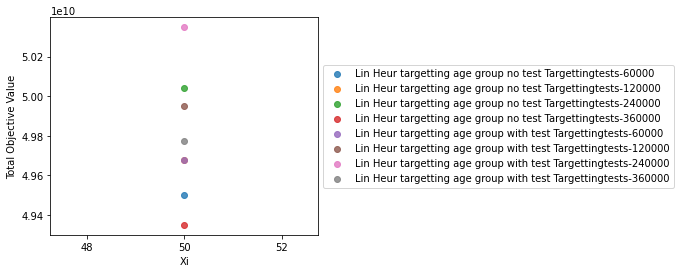

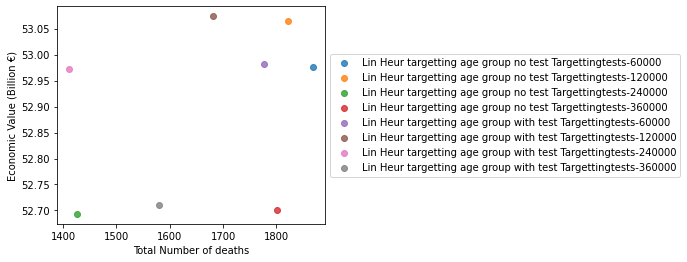

In [10]:
etas = [0.1]
deltas = [0.5]
icus = [2900]
lockdown_freq=14
testing_freq=7
nmtests = [60000, 120000, 240000, 360000]
natests = [0]

heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=False", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"]
# ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
# "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
# linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
# ,"dynamic_gradient"]
#  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
#  ["dynamic_gradient"]
# ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
# ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
# ["dynamic_gradient"]
# , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

# xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

fig1, ax1 = plt.subplots(1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis



fig2, ax2 = plt.subplots(1)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])




markers = [".","D","s","*","+","p","x"]
marker = 0

heuristic_labels={}

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"] = "ROLD AGE-ACT"
heuristic_labels["French_trigger"] = "French Trigger Heuristic (and)"
heuristic_labels["French_trigger_or"] = "French Trigger Heuristic (or)"
heuristic_labels["ICU_admissions_trigger"] = "ICU Admission Trigger Heuristic"
heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"] = "ROLD ACT"

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"] = "ROLD AGE"

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"] = "ROLD NO-TARGET"

heuristic_labels["full_lockdown"] = "Full Lockdown"
heuristic_labels["full_open"] = "Full Open"


handles_ax1 = []
handles_ax2 = []

try:
    old_data = pd.read_excel("plots/results-Fig1.xlsx")
except FileNotFoundError:
    old_data = pd.DataFrame([{
                                            "lock_heuristic":"",
                                            "xi":0,
                                            "icus":0,
                                            "n_m_tests":0,
                                            "eta":0,
                                            "economics_value":0,
                                            "deaths":0,
                                            "reward":0,
                                        }])

new_data = []


for h in heurs:
    for e in etas:
        for d in deltas:
            for i in icus:
                for nm in nmtests:
                    for na in natests:
                        all_deaths = []
                        all_econ_values = []
                        all_xis = []
                        all_rewards = []

                        
                        symbols = ["*",".","d","o","s","^"]
                        
                        for file_name in os.listdir(h):
                            instance = file_name.split("_")

                            for p in instance:
                                if "xi" in p:
                                    xi = float(p.split("-")[1])
                    #                 print(xi)
                                if "icus" in p:
                                    icu = float(p.split("-")[1])
                    #                 print(icu)
                                if "natests" in p:
                                    natest = float(p.split("-")[1])
                    #                 print(natest)
                                if "nmtests" in p:
                                    nmtest = float(p.split("-")[1])
                    #                 print(nmtest)
                                if "dschool" in p:
                                    delta = float(p.split("-")[1])
                    #                 print(delta)
                                if "eta" in p:
                                    eta = float(p.split("-")[1])
                    #                 print(eta)
                                if "T" in p:
                                    T = float(p.split("-")[1])
                    #                 print(eta)

                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and T==90 and xi==1859951.5:
                                print(h)
                                print(instance)
                                
                                print(old_data.loc[(old_data["lock_heuristic"] == h) & ((old_data["xi"] <= ((xi/37199.03) + 1)) & (old_data["xi"] >= ((xi/37199.03) - 1))) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["deaths"])

                                if not old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)].empty:

                                    
                                    print("Found in results")
                                    deaths = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["deaths"].item()
                                    econ_value = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["economics_value"].item()
                                    reward = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["reward"].item()
                                    print(f"reward is {reward}")
                                    print(f"Econ value rerun: {econ_value}")
                                    with open("%s/%s"%(h,file_name)) as file:
                                        result = yaml.load(file, Loader=yaml.UnsafeLoader)
                                    print(f"Econ value original: {result['results']['economics_value']/1e9}")
                                    
                                else:


                                    with open("%s/%s"%(h,file_name)) as file:
                                        result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                    # Read group parameters
                                    with open("../../parameters/fitted.yaml") as file:
                                        universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read econ parameters
                                    with open("../../parameters/econ.yaml") as file:
                                        econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read group parameters
                                    with open("../../parameters/one_group_fitted.yaml") as file:
                                        universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read econ parameters
                                    with open("../../parameters/one_group_econ.yaml") as file:
                                        econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                    start_day = result["experiment_params"]["start_day"]

                                    if result["groups"] == "one":
                                        universe_params = universe_params_one
                                        econ_params = econ_params_one

                                        with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                            initialization = yaml.load(file, Loader=yaml.FullLoader)

                                    elif result["groups"] == "all":
                                        universe_params = universe_params_all
                                        econ_params = econ_params_all

                                        with open("../../initialization/oct21.yaml") as file:
                                            initialization = yaml.load(file, Loader=yaml.FullLoader)
                                    else:
                                        assert(False)

                                    experiment_params = result["experiment_params"]

                                    dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                    for t in range(experiment_params["T"]):
                                        dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                    dynModel.take_end_steps()

                                    deaths = dynModel.get_total_deaths()
                                    econ_value = (dynModel.get_total_reward() + dynModel.get_total_deaths() * xi) / 1e9
                                    reward = dynModel.get_total_reward()
                                    
                                    data = {
                                            "lock_heuristic":h,
                                            "xi":round(result["experiment_params"]["xi"] / 37199.03),
                                            "icus":result["experiment_params"]["icus"],
                                            "n_m_tests":result["experiment_params"]["n_m_tests"],
                                            "eta":result["experiment_params"]["eta"],
                                            "economics_value":(dynModel.get_total_reward() + dynModel.get_total_deaths() * xi) / 1e9,
                                            "deaths":dynModel.get_total_deaths(),
                                            "reward":dynModel.get_total_reward(),
                                        }
                                    
                                    new_data.append(data)






                                all_deaths.append(deaths)
                                all_econ_values.append(econ_value)
                                all_xis.append(round(xi / 37199.03))
                                all_rewards.append(reward)
                        
                        
                        
                        
                        
                        all_rewards = [x for _, x in sorted(zip(all_xis, all_rewards))]
                        all_deaths = [x for _, x in sorted(zip(all_xis, all_deaths))]
                        all_econ_values = [x for _, x in sorted(zip(all_xis, all_econ_values))]
                        all_xis = sorted(all_xis)
                        print(all_rewards)
                        print(all_xis)
                        
                        handles_ax1 += [ax1.scatter(all_xis, all_rewards, label=heuristic_labels[h]+f"tests-{nm}",alpha=0.8)]

                        handles_ax2 += [ax2.scatter(all_deaths, all_econ_values,label=heuristic_labels[h]+f"tests-{nm}",alpha=0.8)]
                        # , color=["r","g","b", "c","m","y"])]

                        marker += 1

                        print(all_econ_values)
                        print(all_deaths)

print(new_data)
new_data_df = pd.DataFrame(new_data)
print(new_data_df)
print(old_data)
old_data.append(new_data_df, ignore_index=True).to_excel(f"plots/results-Fig1.xlsx", index=False)
print(old_data)

handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 0',
                          markerfacecolor='r', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 10 x GDP',
                markerfacecolor='g', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 25 x GDP',
                markerfacecolor='b', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 50 x GDP',
                markerfacecolor='c', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 100 x GDP',
                markerfacecolor='m', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 150 x GDP',
                markerfacecolor='y', markersize=5, alpha=0.5)]

handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 0',
                markerfacecolor='r', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 10 x GDP',
                markerfacecolor='g', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 25 x GDP',
                markerfacecolor='b', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 50 x GDP',
                markerfacecolor='c', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 100 x GDP',
                markerfacecolor='m', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 150 x GDP',
                markerfacecolor='y', markersize=5, alpha=0.5)]



ax1.set(ylabel='Total Objective Value')
ax1.set(xlabel='Xi')
ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

# Put a legend to the right of the current axis
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
fig1.savefig(f"plots/test-Targetting_tests_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



ax2.set(ylabel='Economic Value (Billion €)')
ax2.set(xlabel='Total Number of deaths')


# fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
fig2.savefig(f"plots/test-Targetting_tests_deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
        
# for eta in etas:
#     for delta in deltas:
#         for icu in icus:
#             for nmtest in nmtests:
#                 for natest in natests:
#                     for heur in heurs:
    
# for x,y in zip(all_deaths, all_econ_values):

#     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

    # ax2.annotate(label, # this is the text
    #                     (x,y), # this is the point to label
    #                     textcoords="offset points", # how to position the text
    #                     xytext=(0,10), # distance from text to points (x,y)
    #                     ha='center') # horizontal alignment can be left, right or center




## Figure 2

linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-9671747.799999999', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
1    1106.759678
Name: deaths, dtype: float64
Found in results
linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-5579854.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
2    1235.524425
Name: deaths, dtype: float64
Found in results
linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
3    5053.366063
Name: deaths, dtype: float64
Found i

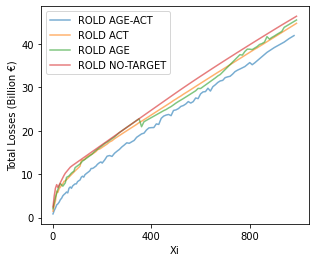

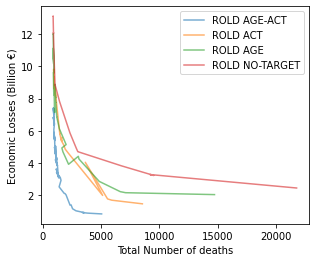

In [19]:
etas = [0.1]
deltas = [0.5]
icus = [2900]
lockdown_freq=14
testing_freq=7
nmtests = [0]
natests = [0]

heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True","linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"]
# ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
# "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
# linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
# ,"dynamic_gradient"]
#  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
#  ["dynamic_gradient"]
# ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
# ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
# ["dynamic_gradient"]
# , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

# xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

fig1, ax1 = plt.subplots(1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis



fig2, ax2 = plt.subplots(1)
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])




markers = [".","D","s","*","+","p","x"]
marker = 0

heuristic_labels={}
heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"] = "ROLD AGE-ACT"
heuristic_labels["French_trigger"] = "French Trigger Heuristic (and)"
heuristic_labels["French_trigger_or"] = "French Trigger Heuristic (or)"
heuristic_labels["ICU_admissions_trigger"] = "ICU Admission Trigger Heuristic"
heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"] = "ROLD ACT"

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"] = "ROLD AGE"

heuristic_labels["linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"] = "ROLD NO-TARGET"

handles_ax1 = []
handles_ax2 = []

try:
    old_data = pd.read_excel("plots/results-Fig2.xlsx")
except FileNotFoundError:
    old_data = pd.DataFrame([{
                                            "lock_heuristic":"",
                                            "xi":0,
                                            "icus":0,
                                            "n_m_tests":0,
                                            "eta":0,
                                            "economics_value":0,
                                            "deaths":0,
                                            "reward":0,
                                        }])

new_data = []


for h in heurs:
    for e in etas:
        for d in deltas:
            for i in icus:
                for nm in nmtests:
                    for na in natests:
                        all_deaths = []
                        all_econ_values = []
                        all_xis = []
                        all_rewards = []

                        
                        symbols = ["*",".","d","o","s","^"]
                        
                        for file_name in os.listdir(h):
                            instance = file_name.split("_")

                            for p in instance:
                                if "xi" in p:
                                    xi = float(p.split("-")[1])
                    #                 print(xi)
                                if "icus" in p:
                                    icu = float(p.split("-")[1])
                    #                 print(icu)
                                if "natests" in p:
                                    natest = float(p.split("-")[1])
                    #                 print(natest)
                                if "nmtests" in p:
                                    nmtest = float(p.split("-")[1])
                    #                 print(nmtest)
                                if "dschool" in p:
                                    delta = float(p.split("-")[1])
                    #                 print(delta)
                                if "eta" in p:
                                    eta = float(p.split("-")[1])
                    #                 print(eta)
                                if "T" in p:
                                    T = float(p.split("-")[1])
                    #                 print(eta)

                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and T==90:
                                print(h)
                                print(instance)
                                
                                print(old_data.loc[(old_data["lock_heuristic"] == h) & ((old_data["xi"] <= ((xi/37199.03) + 1)) & (old_data["xi"] >= ((xi/37199.03) - 1))) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["deaths"])

                                if not old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)].empty:

                                    
                                    print("Found in results")
                                    deaths = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["deaths"].item()
                                    econ_value = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["economic_losses"].item()
                                    reward = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e)]["total_loss"].item()
                                    # print(f"reward is {reward}")
                                    
                                    # print(f"Econ value rerun: {econ_value}")
                                    # with open("%s/%s"%(h,file_name)) as file:
                                    #     result = yaml.load(file, Loader=yaml.UnsafeLoader)
                                    # printf(f"Econ value original: {result['results']['econ_value']/10e9}")

                                else:


                                    with open("%s/%s"%(h,file_name)) as file:
                                        result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                    # Read group parameters
                                    with open("../../parameters/fitted.yaml") as file:
                                        universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read econ parameters
                                    with open("../../parameters/econ.yaml") as file:
                                        econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read group parameters
                                    with open("../../parameters/one_group_fitted.yaml") as file:
                                        universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                    # Read econ parameters
                                    with open("../../parameters/one_group_econ.yaml") as file:
                                        econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                    start_day = result["experiment_params"]["start_day"]

                                    if result["groups"] == "one":
                                        universe_params = universe_params_one
                                        econ_params = econ_params_one

                                        with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                            initialization = yaml.load(file, Loader=yaml.FullLoader)

                                    elif result["groups"] == "all":
                                        universe_params = universe_params_all
                                        econ_params = econ_params_all

                                        with open("../../initialization/oct21.yaml") as file:
                                            initialization = yaml.load(file, Loader=yaml.FullLoader)
                                    else:
                                        assert(False)

                                    experiment_params = result["experiment_params"]

                                    dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                    for t in range(experiment_params["T"]):
                                        dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                    dynModel.take_end_steps()

                                    deaths = dynModel.get_total_deaths()
                                    econ_value = (dynModel.get_total_reward() + dynModel.get_total_deaths() * xi) / 10e9
                                    reward = dynModel.get_total_reward()
                                    
                                    data = {
                                            "lock_heuristic":h,
                                            "xi":round(result["experiment_params"]["xi"] / 37199.03),
                                            "icus":result["experiment_params"]["icus"],
                                            "n_m_tests":result["experiment_params"]["n_m_tests"],
                                            "eta":result["experiment_params"]["eta"],
                                            "economics_value":(dynModel.get_total_reward() + dynModel.get_total_deaths() * xi) / 1e9,
                                            "deaths":dynModel.get_total_deaths(),
                                            "reward":dynModel.get_total_reward() /1e9,
                                        }
                                    
                                    new_data.append(data)






                                all_deaths.append(deaths)
                                all_econ_values.append(econ_value)
                                all_xis.append(round(xi / 37199.03))
                                all_rewards.append(reward)
                        
                        
                        
                        
                        
                        all_rewards = [x for _, x in sorted(zip(all_xis, all_rewards))]
                        all_deaths = [x for _, x in sorted(zip(all_xis, all_deaths))]
                        all_econ_values = [x for _, x in sorted(zip(all_xis, all_econ_values))]
                        all_xis = sorted(all_xis)
                        print(all_rewards)
                        print(all_xis)

                        restricted_xi = [x for x in all_xis if x < 1000]
                        restricted_reward = all_rewards[:len(restricted_xi)]
                        restricted_deaths = all_deaths[:len(restricted_xi)]
                        restricted_econ_values = all_econ_values[:len(restricted_xi)]

                        if h != "full_lockdown" and h!= "full_open":
                            handles_ax1 += [ax1.plot(restricted_xi, restricted_reward, label=heuristic_labels[h],alpha=0.6)]

                            handles_ax2 += [ax2.plot(restricted_deaths, restricted_econ_values,label=heuristic_labels[h],alpha=0.6)]
                        # , color=["r","g","b", "c","m","y"])]

                        if h == "full_lockdown": 
                        
                            handles_ax2 += [ax2.scatter(all_deaths, all_econ_values,label=heuristic_labels[h],alpha=0.6, c="C6")]
                        if h == "full_open":
                            handles_ax2 += [ax2.scatter(all_deaths, all_econ_values,label=heuristic_labels[h],alpha=0.6, c="C7")]
                        
                    
                        marker += 1

                        print(all_econ_values)
                        print(all_deaths)

print(new_data)
new_data_df = pd.DataFrame(new_data)
print(new_data_df)
print(old_data)
old_data.append(new_data_df, ignore_index=True).to_excel(f"plots/results-Fig2.xlsx", index=False)
print(old_data)

handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 0',
                          markerfacecolor='r', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 10 x GDP',
                markerfacecolor='g', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 25 x GDP',
                markerfacecolor='b', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 50 x GDP',
                markerfacecolor='c', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 100 x GDP',
                markerfacecolor='m', markersize=5, alpha=0.5)]
handles_ax1 += [Line2D([0], [0], marker='o', color='w', label='Xi = 150 x GDP',
                markerfacecolor='y', markersize=5, alpha=0.5)]

handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 0',
                markerfacecolor='r', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 10 x GDP',
                markerfacecolor='g', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 25 x GDP',
                markerfacecolor='b', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 50 x GDP',
                markerfacecolor='c', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 100 x GDP',
                markerfacecolor='m', markersize=5, alpha=0.5)]
handles_ax2 += [Line2D([0], [0], marker='o', color='w', label='Xi = 150 x GDP',
                markerfacecolor='y', markersize=5, alpha=0.5)]



ax1.set(ylabel='Total Losses (Billion €)')
ax1.set(xlabel='Xi')
ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

# Put a legend to the right of the current axis
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.legend(loc='best')
# , handles=handles_ax1)

# ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
fig1.savefig(f"plots/Fig2_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



ax2.set(ylabel='Economic Losses (Billion €)')
ax2.set(xlabel='Total Number of deaths')


# fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2.legend(loc='best')
# , handles=handles_ax2)

# ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
fig2.savefig(f"plots/Fig2_deaths_vs_econLosses_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
        
# for eta in etas:
#     for delta in deltas:
#         for icu in icus:
#             for nmtest in nmtests:
#                 for natest in natests:
#                     for heur in heurs:
    
# for x,y in zip(all_deaths, all_econ_values):

#     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

    # ax2.annotate(label, # this is the text
    #                     (x,y), # this is the point to label
    #                     textcoords="offset points", # how to position the text
    #                     xytext=(0,10), # distance from text to points (x,y)
    #                     ha='center') # horizontal alignment can be left, right or center


# Policy plotting

## Figure 3

linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True
['xi-1859951.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-60000.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
Total population is 12278209.994397134
Sum of I across the horizon is: 1887867.4389640053
Delta in S is: 2658518.9831584515
S at time T: 10168741.13577858
S at time T: 9619691.011238681
I at time T: 58056.8557142513
Minimum I over time: 6654.426153462765
Minimum I+E over time: 13349.882169433371


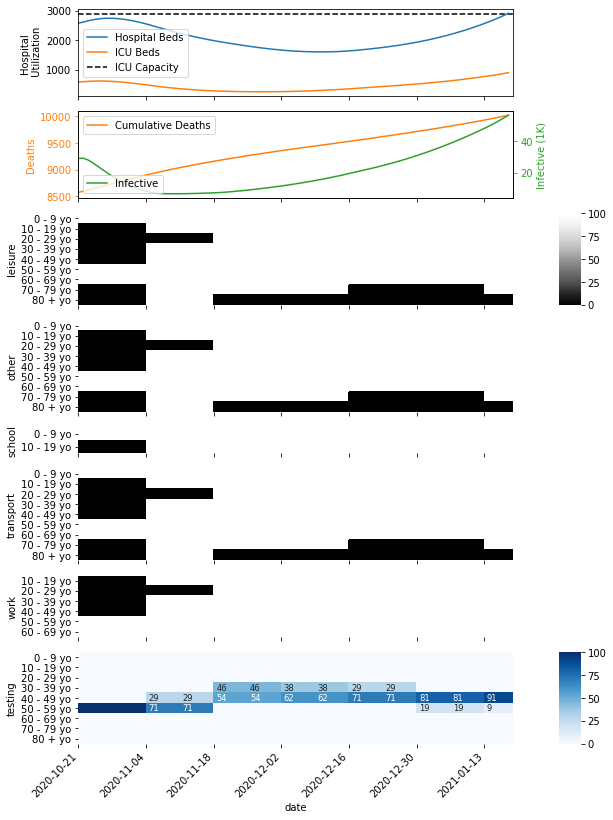

In [8]:


def todate(x, pos, initial_date=DT.date(2020, 10, 21)):
    return initial_date+DT.timedelta(days=x)

fmt = ticker.FuncFormatter(todate)


icus_to_try = [2900]
# ,2900,3200]
etas_to_try = [0.1]
# ,0.1,0.2]

xi_mult_values = [50]
# 0,10,25,50,100,150
xi_to_try = [mult * 37199.03  for mult in xi_mult_values]



for et in etas_to_try:
    for ic in icus_to_try:
        for x in xi_to_try:

            etas = [et]
            deltas = [0.5]
            icus = [ic]
            lockdown_freq=14
            testing_freq=7
            nmtests = [60000]
                # 264357.37845079537, 271874.64987593645]
            natests = [0]
            xis = [x]

            heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"]
            
            # "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"]
            # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
            # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
            # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
            # ,"dynamic_gradient"]
            #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            #  ["dynamic_gradient"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
            # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
            # ["dynamic_gradient"]
            # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

            # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        

            for h in heurs:
                for e in etas:
                    for d in deltas:
                        for i in icus:
                            for nm in nmtests:
                                for na in natests:
                                    for xx in xis:
                                        
                                        # fig, ax  = plt.subplots(2, 2, sharex='col', gridspec_kw={'width_ratios':[100,5]})
                                        # ax[0,1].remove()  # remove unused upper right axes
                                        # ax[0,0].plot(x+0.5,L_1,'-', marker='o',color='tab:orange')
                                        # sns.heatmap(M_1, cmap=cmap, vmax=np.max(M_1), center=np.max(M_1)/2., square=False, ax=ax[1,0], cbar_ax=ax[1,1])


                                        fig, ax = plt.subplots(8,2, sharex='col', gridspec_kw={'width_ratios':[100,5], 'height_ratios':[17,17,18,18,5,18,12,18]}, figsize=[9,15])
                                        # fig.suptitle(f"Lockdown policies for heur: {h}, eta:{e}, icu:{i}, xi:{xx}")
                                        
                                        ax2 = ax[1,0].twinx()
                                        ax2.set_prop_cycle('color',plt.cm.PRGn(np.linspace(0,1,7)))
                                        ax[0,1].remove()  # remove unused upper right axes
                                        ax[1,1].remove()
                                        
                                        ax[3,1].remove()
                                        ax[4,1].remove()
                                        ax[5,1].remove()
                                        ax[6,1].remove()
                                        # box = ax.get_position()
                                        # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                                        symbols = ["*",".","d","o","s","^"]
                                        T=90

                                        lockdowns_leisure = np.zeros((9, T))
                                        lockdowns_other = np.zeros((9, T))
                                        lockdowns_school = np.zeros((2, T))
                                        lockdowns_transport = np.zeros((9, T))
                                        lockdowns_work = np.zeros((6, T))

                                        testing = np.zeros((9, T))

                                        for file_name in os.listdir(h):
                                            instance = file_name.split("_")

                                            for p in instance:
                                                if "xi" in p:
                                                    xi = float(p.split("-")[1])
                                                    # print(xi)
                                                if "icus" in p:
                                                    icu = float(p.split("-")[1])
                                    #                 print(icu)
                                                if "natests" in p:
                                                    natest = float(p.split("-")[1])
                                    #                 print(natest)
                                                if "nmtests" in p:
                                                    nmtest = float(p.split("-")[1])
                                    #                 print(nmtest)
                                                if "dschool" in p:
                                                    delta = float(p.split("-")[1])
                                    #                 print(delta)
                                                if "eta" in p:
                                                    eta = float(p.split("-")[1])
                                    #                 print(eta)
                                                if "T" in p:
                                                    time = float(p.split("-")[1])

                                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and (math.floor(xi)==math.floor(xx)) and (time == 90) :
                                                print(h)
                                                print(instance)



                                                
                                                with open("%s/%s"%(h,file_name)) as file:
                                                    result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                                # Read group parameters
                                                with open("../../parameters/fitted.yaml") as file:
                                                    universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/econ.yaml") as file:
                                                    econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read group parameters
                                                with open("../../parameters/one_group_fitted.yaml") as file:
                                                    universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/one_group_econ.yaml") as file:
                                                    econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                                start_day = result["experiment_params"]["start_day"]

                                                if result["groups"] == "one":
                                                    universe_params = universe_params_one
                                                    econ_params = econ_params_one

                                                    with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)

                                                elif result["groups"] == "all":
                                                    universe_params = universe_params_all
                                                    econ_params = econ_params_all

                                                    with open("../../initialization/oct21.yaml") as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)
                                                else:
                                                    assert(False)

                                                experiment_params = result["experiment_params"]

                                                dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                                for t in range(experiment_params["T"]):
                                                    dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                                dynModel.take_end_steps()

                                                
                                                groups = dynModel.groups.keys()
                                                groups = sorted(groups)  
                                                print("====================================")
                                                print(f"Total population is {sum([dynModel.groups[group].S[0] for group in groups])+sum([dynModel.groups[group].E[0] for group in groups])+sum([dynModel.groups[group].I[0] for group in groups])+sum([dynModel.groups[group].R[0] for group in groups])+sum([dynModel.groups[group].Ia[0] for group in groups])+sum([dynModel.groups[group].Ips[0] for group in groups])+sum([dynModel.groups[group].Ims[0] for group in groups])+sum([dynModel.groups[group].Iss[0] for group in groups])+sum([dynModel.groups[group].Rq[0] for group in groups])+sum([dynModel.groups[group].H[0] for group in groups])+sum([dynModel.groups[group].ICU[0] for group in groups])+sum([dynModel.groups[group].D[0] for group in groups])}")
                                                print(f"Sum of I across the horizon is: {sum([sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)])}")
                                                print(f"Delta in S is: {sum([dynModel.groups[group].S[0] for group in groups]) - sum([dynModel.groups[group].S[T] for group in groups]) + sum([dynModel.groups[group].E[0] for group in groups]) + sum([dynModel.groups[group].I[0] for group in groups])+sum([dynModel.groups[group].R[0] for group in groups])+sum([dynModel.groups[group].Ia[0] for group in groups])+sum([dynModel.groups[group].Ips[0] for group in groups])+sum([dynModel.groups[group].Ims[0] for group in groups])+sum([dynModel.groups[group].Iss[0] for group in groups])+sum([dynModel.groups[group].Rq[0] for group in groups])+sum([dynModel.groups[group].H[0] for group in groups])+sum([dynModel.groups[group].ICU[0] for group in groups])+sum([dynModel.groups[group].D[0] for group in groups])}")
                                                print(f"S at time T: {sum([dynModel.groups[group].S[0] for group in groups])}")
                                                print(f"S at time T: {sum([dynModel.groups[group].S[T] for group in groups])}")
                                                print(f"I at time T: {sum([dynModel.groups[group].I[T] for group in groups])}")
                                                print(f"Minimum I over time: {min([sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)])}")
                                                print(f"Minimum I+E over time: {min([sum([dynModel.groups[group].I[i] + dynModel.groups[group].E[i] for group in groups]) for i in range(T)])}")




                                                # T = dynModel.time_steps - dynModel.END_DAYS

                                                # time_axis = [i*dynModel.dt for i in range(T+1)]
                                                # time_axis_controls = [i*dynModel.dt for i in range(T)]

                                                groups = dynModel.groups.keys()
                                                groups = sorted(groups)                                        

                                                
                                                ax[0,0].plot(range(T), [sum([dynModel.groups[group].H[i] for group in groups]) for i in range(T)], label=f"Hospital Beds");
                                                ax[0,0].plot(range(T), [sum([dynModel.groups[group].ICU[i] for group in groups]) for i in range(T)], label=f"ICU Beds");
                                                ax[0,0].hlines(dynModel.icus, 0, T, linestyle="dashed", colors=['black'], label="ICU Capacity")
                                                ax[1,0].plot(range(T), [sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)], label=f"Cumulative Deaths", color="C1");
                                                
                                                

                                                ax2.plot(range(T), [sum([dynModel.groups[group].I[i] for group in groups])/1000 for i in range(T)], label=f"Infective", color="C2")
                                                ax2.legend(loc="lower left")
                                                ax2.set_ylabel("Infective (1K)", color="C2")
                                                ax2.yaxis.set_label_position('right')
                                                ax2.tick_params(axis='y', colors="C2")

                                                # ax[0,0].plot(range(T), [sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)], label="Total Infected")
                                                ax[0,0].set_ylabel("Hospital \n Utilization")
                                                ax[0,0].legend();

                                                ax[1,0].set_ylabel("Deaths", color="C1")
                                                ax[1,0].tick_params(axis="y", colors="C1")

                                                ax[1,0].set_ylim(bottom=min([sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)])-100)
                                                ax[1,0].legend()

                                                # ax[1,0].tick_params(axis="x", bottom=True, reset=True)

                                                age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79','age_group_80_plus']
                                                # age_groups = ["all_age_groups"]
                                                SEIR_groups = [ 'S_g', 'E_g', 'I_g', 'R_g', 'N_g', 'Ia_g', 'Ips_g', \
                                                    'Ims_g', 'Iss_g', 'Rq_g', 'H_g', 'ICU_g', 'D_g' ]
                                                activities = ['home','leisure','other','school','transport','work']

                                                
                                                
                                                total_days = dynModel.time_steps - dynModel.END_DAYS

                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_leisure[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["leisure"]  * 100)
                                                        lockdowns_other[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["other"]  * 100)
                                                        lockdowns_transport[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["transport"]  * 100)
                                                        
                                                        testing[age_groups.index(n)][t] = round((dynModel.m_tests_controls[t][n] / nm)*100) if nm>0 else 0
                                                
                                                for n in [0,1]:
                                                    for t in range(T):
                                                        lockdowns_school[n][t] = round(dynModel.lockdown_controls[t][age_groups[n]]["school"] * 100)
                                                
                                                for n in [1,2,3,4,5,6]:
                                                    for t in range(T):
                                                        lockdowns_work[n-1][t] = round(dynModel.lockdown_controls[t][age_groups[n]]["work"] * 100)


                                                # print(f"Lockdowns leisure after T = {total_days}: {lockdowns_leisure}")


                                                                # print(dynModel.lockdown_controls[t][n][act])
                                                # print(lockdowns_sim)


                                                # print(f"shape of policy: {np.reshape(np.array(result['policy']), (-1,1)).shape} ")
                                                width = ax[0,0].get_xticks()[1] - ax[0,0].get_xticks()[0]
                                                 
                                                
                                                
                                                # ax[1,0].set_xticks(new_ax) 
                                                # print(result['policy'])
                                        
                                        # print(lockdowns_leisure)
                                        
                                        y_age_labels = ["0 - 9 yo","10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo","70 - 79 yo","80 + yo"]
                                        y_age_labels_school = ["0 - 9 yo","10 - 19 yo"]
                                        y_age_labels_work = ["10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo"]



                                        leisure_annot = [[("" if (lockdowns_leisure[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_leisure[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}

                                        ax[2,0] = sns.heatmap(lockdowns_leisure, vmin=0, vmax=100, cmap='Greys_r', cbar_ax=ax[2,1], ax=ax[2,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=leisure_annot, fmt="s", annot_kws=akws);
                                        ax[2,0].set_ylabel("leisure")

                                        other_annot = [[("" if (lockdowns_other[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_other[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}


                                        
                                        ax[3,0] = sns.heatmap(lockdowns_other, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[3,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=other_annot, fmt="s", annot_kws=akws);
                                        ax[3,0].set_ylabel("other")

                                        school_annot = [[("" if (lockdowns_school[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_school[n][t])}")    for t in range(T)   ] for n in range(2)]
                                        akws = {"size":'small', "ha":"left"}


                                        ax[4,0] = sns.heatmap(lockdowns_school, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[4,0], yticklabels=y_age_labels_school,linewidths=0.0, rasterized=True, annot=school_annot, fmt="s", annot_kws=akws);
                                        ax[4,0].set_ylabel("school")

                                        transport_annot = [[("" if (lockdowns_transport[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_transport[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}
                                        
                                        ax[5,0] = sns.heatmap(lockdowns_transport, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[5,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=transport_annot, fmt="s", annot_kws=akws);
                                        ax[5,0].set_ylabel("transport")
                                        
                                        work_annot = [[("" if (lockdowns_work[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_work[n][t])}")    for t in range(T)   ] for n in range(6)]
                                        akws = {"size":'small', "ha":"left"}

                                        
                                        
                                        ax[6,0] = sns.heatmap(lockdowns_work, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[6,0], yticklabels=y_age_labels_work,linewidths=0.0, rasterized=True, annot=work_annot, fmt="s", annot_kws=akws);
                                        ax[6,0].set_ylabel("work")
                                        
                                        testing_annot = [[("" if (testing[n][t] in [0,100] or t%7!=0) else f"{int(testing[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}
                                        ax[7,0] = sns.heatmap(testing, vmin=0, vmax=100, cmap='Blues', cbar_ax=ax[7,1], ax=ax[7,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=testing_annot, fmt="s", annot_kws=akws);
                                        ax[7,0].set_ylabel("testing")

                                        ax[7,0].xaxis.set_major_formatter(fmt)
                                        fig.autofmt_xdate(rotation=45)  
                                        ax[7,0].xaxis.set_ticks(np.arange(0, T+1, 14.0))

                                        ax[7,0].set_xlabel("date")

                                        # ax[6,0].xaxis.set_ticks(range(0,90,7))

                                        # ax[6,0].set_xticks(np.arange(0,90,7))

                                        a = fig.savefig(f"plots/test-Fig3-policies_heur={h}_eta={e}_icu={i}_xi={xx}_T={T}_nmtests={nm}.pdf", bbox_inches='tight');
                                           
                                




a
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-929975.75', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-1.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-929975.75', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-0.5.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-929975.75', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0

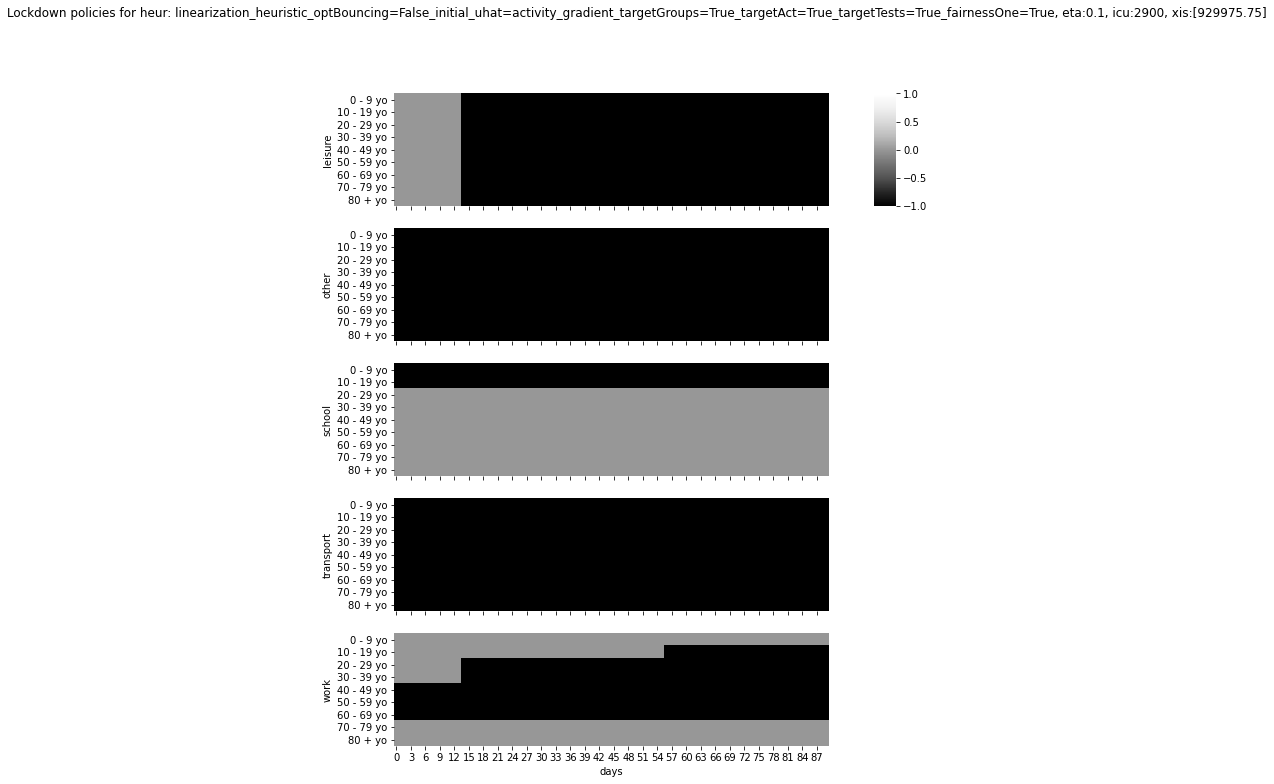

In [3]:
icus_to_try = [2900]
# ,2900,3200]
etas_to_try = [0.1]
# ,0.1,0.2]

xi_mult_values = [25,30]
# 0,10,25,50,100,150
xi_to_try = [mult * 37199.03  for mult in xi_mult_values]

for et in etas_to_try:
    for ic in icus_to_try:
        for index in range(len(xi_to_try)-1):

            etas = [et]
            deltas = [0.5]
            icus = [ic]
            lockdown_freq=14
            testing_freq=7
            nmtests = [0]
            natests = [0]
            xis = [25 * 37199.03]
            # xi_to_try[index:index+2]

            heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
            # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
            # ,"dynamic_gradient"]
            #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            #  ["dynamic_gradient"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
            # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
            # ["dynamic_gradient"]
            # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

            # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        

            for h in heurs:
                for e in etas:
                    for d in deltas:
                        for i in icus:
                            for nm in nmtests:
                                for na in natests:


                                    # fig, ax  = plt.subplots(2, 2, sharex='col', gridspec_kw={'width_ratios':[100,5]})
                                    # ax[0,1].remove()  # remove unused upper right axes
                                    # ax[0,0].plot(x+0.5,L_1,'-', marker='o',color='tab:orange')
                                    # sns.heatmap(M_1, cmap=cmap, vmax=np.max(M_1), center=np.max(M_1)/2., square=False, ax=ax[1,0], cbar_ax=ax[1,1])


                                    fig, ax = plt.subplots(5,2, sharex='col', gridspec_kw={'width_ratios':[100,5]}, figsize=(9,12))
                                    fig.suptitle(f"Lockdown policies for heur: {h}, eta:{e}, icu:{i}, xis:{xis}")

                                    ax[1,1].remove()
                                    ax[2,1].remove()
                                    ax[3,1].remove()
                                    ax[4,1].remove()
                                    # box = ax.get_position()
                                    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                                    symbols = ["*",".","d","o","s","^"]

                                    lockdowns_leisure = np.zeros((9, 90))
                                    lockdowns_other = np.zeros((9, 90))
                                    lockdowns_school = np.zeros((9, 90))
                                    lockdowns_transport = np.zeros((9, 90))
                                    lockdowns_work = np.zeros((9, 90))

                                    print("a")
                                    
                                    for file_name in os.listdir(h):
                                        instance = file_name.split("_")

                                        for p in instance:
                                            if "xi" in p:
                                                xi = float(p.split("-")[1])
                                                # print(xi)
                                            if "icus" in p:
                                                icu = float(p.split("-")[1])
                                #                 print(icu)
                                            if "natests" in p:
                                                natest = float(p.split("-")[1])
                                #                 print(natest)
                                            if "nmtests" in p:
                                                nmtest = float(p.split("-")[1])
                                #                 print(nmtest)
                                            if "dschool" in p:
                                                delta = float(p.split("-")[1])
                                #                 print(delta)
                                            if "eta" in p:
                                                eta = float(p.split("-")[1])
                                #                 print(eta)
                                        if eta == e and icu == i and nmtest == nm and natest == na and delta == d and (math.floor(xi) in [math.floor(xx) for xx in xis]) :
                                            print(h)
                                            print(instance)

                                            with open("%s/%s"%(h,file_name)) as file:
                                                result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                            # Read group parameters
                                            with open("../../parameters/fitted.yaml") as file:
                                                universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                            # Read econ parameters
                                            with open("../../parameters/econ.yaml") as file:
                                                econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                            # Read group parameters
                                            with open("../../parameters/one_group_fitted.yaml") as file:
                                                universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                            # Read econ parameters
                                            with open("../../parameters/one_group_econ.yaml") as file:
                                                econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                            start_day = result["experiment_params"]["start_day"]

                                            if result["groups"] == "one":
                                                universe_params = universe_params_one
                                                econ_params = econ_params_one

                                                with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                    initialization = yaml.load(file, Loader=yaml.FullLoader)

                                            elif result["groups"] == "all":
                                                universe_params = universe_params_all
                                                econ_params = econ_params_all

                                                with open("../../initialization/oct21.yaml") as file:
                                                    initialization = yaml.load(file, Loader=yaml.FullLoader)
                                            else:
                                                assert(False)

                                            experiment_params = result["experiment_params"]

                                            dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                            for t in range(experiment_params["T"]):
                                                dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                            dynModel.take_end_steps()

                                            T = dynModel.time_steps - dynModel.END_DAYS

                                            # time_axis = [i*dynModel.dt for i in range(T+1)]
                                            # time_axis_controls = [i*dynModel.dt for i in range(T)]

                                            groups = dynModel.groups.keys()
                                            groups = sorted(groups)                                        



                                            age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79','age_group_80_plus']
                                            # age_groups = ["all_age_groups"]
                                            SEIR_groups = [ 'S_g', 'E_g', 'I_g', 'R_g', 'N_g', 'Ia_g', 'Ips_g', \
                                                'Ims_g', 'Iss_g', 'Rq_g', 'H_g', 'ICU_g', 'D_g' ]
                                            activities = ['home','leisure','other','school','transport','work']


                                            for n in dynModel.groups:
                                                for t in range(T):        
                                                    lockdowns_leisure[age_groups.index(n)][t] -= (1 - 2 * [math.floor(xx) for xx in xis].index(math.floor(xi)) ) * dynModel.lockdown_controls[t][n]["leisure"]
                                            for n in dynModel.groups:
                                                for t in range(T):        
                                                    lockdowns_other[age_groups.index(n)][t] -=  (1 - 2 * [math.floor(xx) for xx in xis].index(math.floor(xi)) ) * dynModel.lockdown_controls[t][n]["other"]

                                            for n in dynModel.groups:
                                                for t in range(T):        
                                                    lockdowns_school[age_groups.index(n)][t] -=  (1 - 2 * [math.floor(xx) for xx in xis].index(math.floor(xi)) ) * dynModel.lockdown_controls[t][n]["school"]

                                            for n in dynModel.groups:
                                                for t in range(T):        
                                                    lockdowns_transport[age_groups.index(n)][t] -=  (1 - 2 * [math.floor(xx) for xx in xis].index(math.floor(xi)) ) * dynModel.lockdown_controls[t][n]["transport"]

                                            for n in dynModel.groups:
                                                for t in range(T):        
                                                    lockdowns_work[age_groups.index(n)][t] -=  (1 - 2 * [math.floor(xx) for xx in xis].index(math.floor(xi)) ) * dynModel.lockdown_controls[t][n]["work"]


                                                            # print(dynModel.lockdown_controls[t][n][act])
                                            # print(lockdowns_sim)


                                            # print(f"shape of policy: {np.reshape(np.array(result['policy']), (-1,1)).shape} ")




                                            # ax[1,0].set_xticks(new_ax) 
                                            # print(result['policy'])
                                    y_age_labels = ["0 - 9 yo","10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo","70 - 79 yo","80 + yo"]

                                    ax[0,0] = sns.heatmap(lockdowns_leisure, vmin=-1, vmax=1, cmap='Greys_r', cbar_ax=ax[0,1], ax=ax[0,0], yticklabels=y_age_labels)
                                    ax[0,0].set_ylabel("leisure")


                                    ax[1,0] = sns.heatmap(lockdowns_other, vmin=-1, vmax=1, cmap='Greys_r', cbar=False, ax=ax[1,0], yticklabels=y_age_labels)
                                    ax[1,0].set_ylabel("other")


                                    ax[2,0] = sns.heatmap(lockdowns_school, vmin=-1, vmax=1, cmap='Greys_r', cbar=False, ax=ax[2,0], yticklabels=y_age_labels)
                                    ax[2,0].set_ylabel("school")


                                    ax[3,0] = sns.heatmap(lockdowns_transport, vmin=-1, vmax=1, cmap='Greys_r', cbar=False, ax=ax[3,0], yticklabels=y_age_labels)
                                    ax[3,0].set_ylabel("transport")

                                    ax[4,0] = sns.heatmap(lockdowns_work, vmin=-1, vmax=1, cmap='Greys_r', cbar=False, ax=ax[4,0], yticklabels=y_age_labels)
                                    ax[4,0].set_ylabel("work")
                                    ax[4,0].set_xlabel("days")

#                                             fig.savefig(f"plots/policies_heur={h}_eta={e}_icu={i}_xi={xx}.pdf", bbox_inches='tight')
                                    plt.show()



            # # for x,y in zip(all_deaths, all_econ_values):

            # #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

            #     # ax2.annotate(label, # this is the text
            #     #                     (x,y), # this is the point to label
            #     #                     textcoords="offset points", # how to position the text
            #     #                     xytext=(0,10), # distance from text to points (x,y)
            #     #                     ha='center') # horizontal alignment can be left, right or center

            # ax1.set(ylabel='Total Objective Value')
            # ax1.set(xlabel='Xi')
            # ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

            # # Put a legend to the right of the current axis
            # ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

            # ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
            # fig1.savefig(f"plots/simple_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



            # ax2.set(ylabel='Economic Value ($)')
            # ax2.set(xlabel='Total Number of deaths')


            # fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

            # ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
            # fig2.savefig(f"plots/simple_deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
                        
            # # for eta in etas:
            # #     for delta in deltas:
            # #         for icu in icus:
            # #             for nmtest in nmtests:
            # #                 for natest in natests:
            # #                     for heur in heurs:
                                    
                                




linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-371990.3', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-0.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-371990.3', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-0.25.yaml']


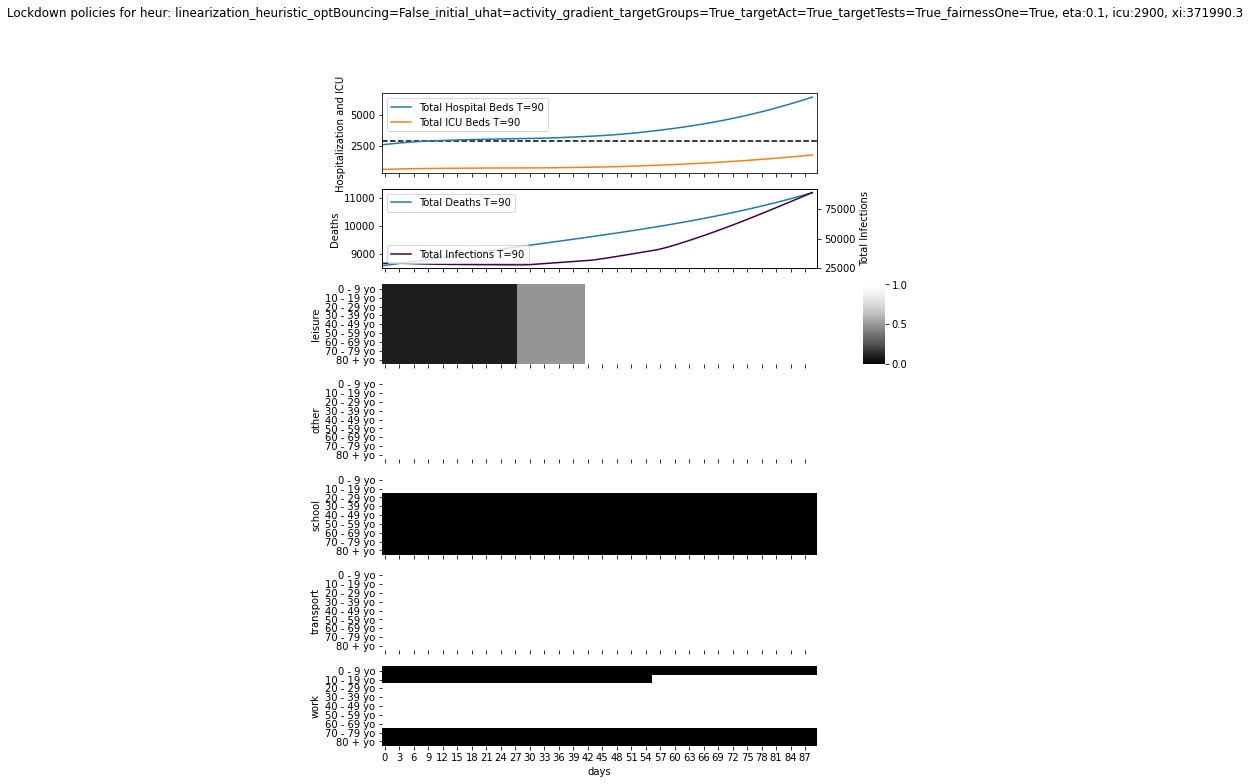

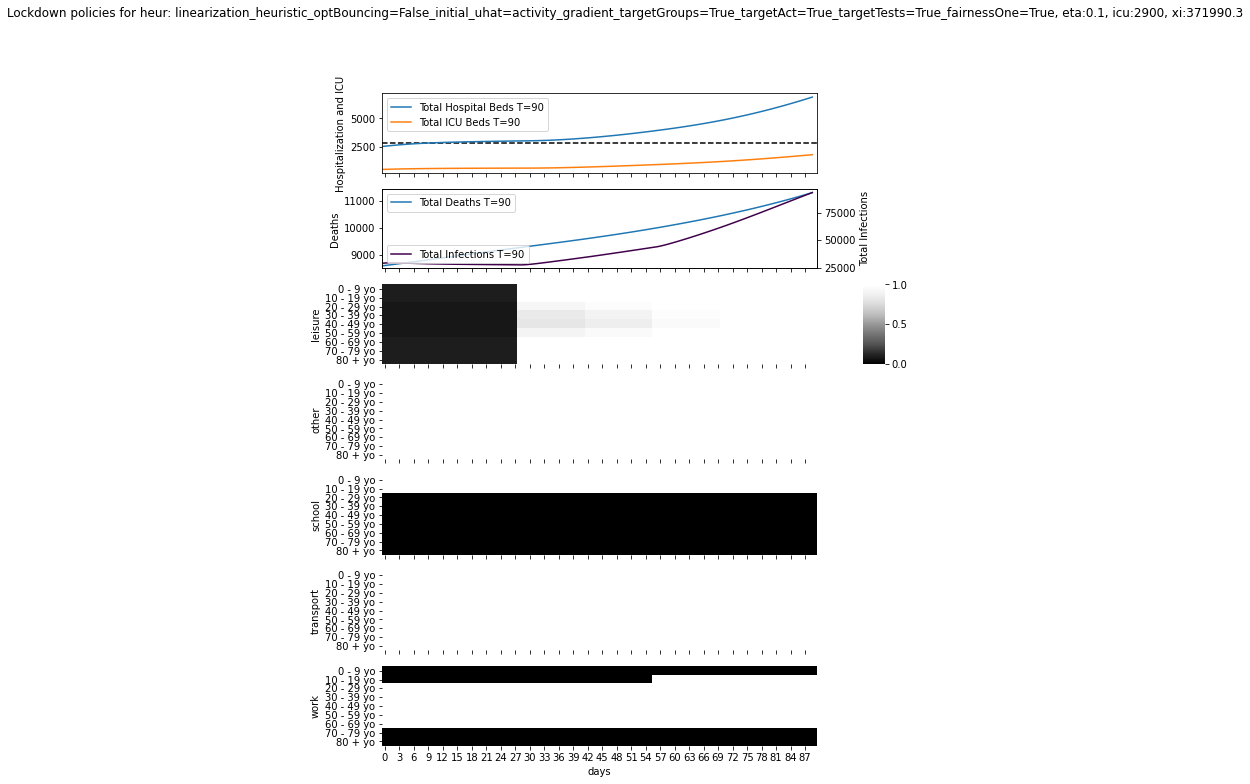

In [8]:
icus_to_try = [2900]
# ,2900,3200]
etas_to_try = [0.1]
# ,0.1,0.2]

deltaFair_to_try = [0,0.25]

xi_mult_values = [10]
# 0,10,25,50,100,150
xi_to_try = [mult * 37199.03  for mult in xi_mult_values]

for et in etas_to_try:
    for ic in icus_to_try:
        for x in xi_to_try:
            for deltaFair in deltaFair_to_try:

                etas = [et]
                deltas = [0.5]
                icus = [ic]
                lockdown_freq=14
                testing_freq=7
                nmtests = [0]
                natests = [0]
                xis = [x]
                deltaFairs = [deltaFair]

                heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True"]
                # "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"
                # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
                # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
                # "linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
                # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
                # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
                # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
                # ,"dynamic_gradient"]
                #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
                #  ["dynamic_gradient"]
                # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
                # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
                # ["dynamic_gradient"]
                # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

                # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

            

                T = 90
                for e in etas:
                    for d in deltas:
                        for i in icus:
                            for nm in nmtests:
                                for na in natests:
                                    for xx in xis:
                                        for deltaFair in deltaFairs:
                                        
                                        # fig, ax  = plt.subplots(2, 2, sharex='col', gridspec_kw={'width_ratios':[100,5]})
                                        # ax[0,1].remove()  # remove unused upper right axes
                                        # ax[0,0].plot(x+0.5,L_1,'-', marker='o',color='tab:orange')
                                        # sns.heatmap(M_1, cmap=cmap, vmax=np.max(M_1), center=np.max(M_1)/2., square=False, ax=ax[1,0], cbar_ax=ax[1,1])

                                            for h in heurs:
                                                fig, ax = plt.subplots(7,2, sharex='col', gridspec_kw={'width_ratios':[100,5]}, figsize=(9,12))
                                                fig.suptitle(f"Lockdown policies for heur: {h}, eta:{e}, icu:{i}, xi:{xx}")
                                                
                                                ax2 = ax[1,0].twinx()
                                                ax2.set_prop_cycle('color',plt.cm.PRGn(np.linspace(0,1,7)))
                                                ax[0,1].remove()  # remove unused upper right axes
                                                ax[1,1].remove()
                                                
                                                ax[3,1].remove()
                                                ax[4,1].remove()
                                                ax[5,1].remove()
                                                ax[6,1].remove()
                                                # box = ax.get_position()
                                                # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                                                symbols = ["*",".","d","o","s","^"]
                                                
                                                lockdowns_leisure = np.zeros((9, T))
                                                lockdowns_other = np.zeros((9, T))
                                                lockdowns_school = np.zeros((9, T))
                                                lockdowns_transport = np.zeros((9, T))
                                                lockdowns_work = np.zeros((9, T))

                                            

                                                for file_name in os.listdir(h):
                                                    instance = file_name.split("_")

                                                    for p in instance:
                                                        if "xi" in p:
                                                            xi = float(p.split("-")[1])
                                                            # print(xi)
                                                        if "icus" in p:
                                                            icu = float(p.split("-")[1])
                                            #                 print(icu)
                                                        if "natests" in p:
                                                            natest = float(p.split("-")[1])
                                            #                 print(natest)
                                                        if "nmtests" in p:
                                                            nmtest = float(p.split("-")[1])
                                            #                 print(nmtest)
                                                        if "dschool" in p:
                                                            delta = float(p.split("-")[1])
                                            #                 print(delta)
                                                        if "eta" in p:
                                                            eta = float(p.split("-")[1])
                                            #                 print(eta)
                                                        if "deltaFair" in p:
                                                            deltaFair = float(p.split("-")[1][:-5])
                                                            if deltaFair == 200.0:
                                                                    
                                                                print(deltaFair)
                                                                print(p.split("-")[1])
                                                                print(deltaFairs[0])
                                                                print(delta)
                                                                print(d)
                                                                print(eta)
                                                                print(e)
                                                                print(icu)
                                                                print(i)
                                                                print(math.floor(xi))
                                                                print(math.floor(xx))

                                                    if eta == e and icu == i and nmtest == nm and natest == na and delta == d and (math.floor(xi)==math.floor(xx)) and  deltaFair == deltaFairs[0]:
                                                        print(h)
                                                        print(instance)
                                                        
                                                        with open("%s/%s"%(h,file_name)) as file:
                                                            result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                                        # Read group parameters
                                                        with open("../../parameters/fitted.yaml") as file:
                                                            universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                        # Read econ parameters
                                                        with open("../../parameters/econ.yaml") as file:
                                                            econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                        # Read group parameters
                                                        with open("../../parameters/one_group_fitted.yaml") as file:
                                                            universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                                        # Read econ parameters
                                                        with open("../../parameters/one_group_econ.yaml") as file:
                                                            econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                                        start_day = result["experiment_params"]["start_day"]

                                                        if result["groups"] == "one":
                                                            universe_params = universe_params_one
                                                            econ_params = econ_params_one

                                                            with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                                initialization = yaml.load(file, Loader=yaml.FullLoader)

                                                        elif result["groups"] == "all":
                                                            universe_params = universe_params_all
                                                            econ_params = econ_params_all

                                                            with open("../../initialization/oct21.yaml") as file:
                                                                initialization = yaml.load(file, Loader=yaml.FullLoader)
                                                        else:
                                                            assert(False)

                                                        experiment_params = result["experiment_params"]

                                                        dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                                        for t in range(experiment_params["T"]):
                                                            dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                                        dynModel.take_end_steps()

                                                        T=90

                                                        # T = dynModel.time_steps - dynModel.END_DAYS

                                                        # time_axis = [i*dynModel.dt for i in range(T+1)]
                                                        # time_axis_controls = [i*dynModel.dt for i in range(T)]

                                                        groups = dynModel.groups.keys()
                                                        groups = sorted(groups)                                        

                                                        
                                                        ax[0,0].plot(range(T), [sum([dynModel.groups[group].H[i] for group in groups]) for i in range(T)], label=f"Total Hospital Beds T={dynModel.time_steps - dynModel.END_DAYS}");
                                                        ax[0,0].plot(range(T), [sum([dynModel.groups[group].ICU[i] for group in groups]) for i in range(T)], label=f"Total ICU Beds T={dynModel.time_steps - dynModel.END_DAYS}");
                                                        ax[0,0].hlines(dynModel.icus, 0, T, linestyle="dashed", colors=['black'])
                                                        ax[1,0].plot(range(T), [sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)], label=f"Total Deaths T={dynModel.time_steps - dynModel.END_DAYS}");
                                                        

                                                        ax2.plot(range(T), [sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)], label=f"Total Infections T={dynModel.time_steps - dynModel.END_DAYS}")
                                                        ax2.legend(loc="lower left")
                                                        ax2.set_ylabel("Total Infections")
                                                        # ax[0,0].plot(range(T), [sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)], label="Total Infected")
                                                        ax[0,0].set_ylabel("Hospitalization and ICU")
                                                        ax[0,0].legend();

                                                        ax[1,0].set_ylabel("Deaths")
                                                        ax[1,0].set_ylim(bottom=min([sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)])-100)
                                                        ax[1,0].legend()

                                                        # ax[1,0].tick_params(axis="x", bottom=True, reset=True)

                                                        age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79','age_group_80_plus']
                                                        # age_groups = ["all_age_groups"]
                                                        SEIR_groups = [ 'S_g', 'E_g', 'I_g', 'R_g', 'N_g', 'Ia_g', 'Ips_g', \
                                                            'Ims_g', 'Iss_g', 'Rq_g', 'H_g', 'ICU_g', 'D_g' ]
                                                        activities = ['home','leisure','other','school','transport','work']

                                                        
                                                        
                                                        total_days = dynModel.time_steps - dynModel.END_DAYS

                                                        for n in dynModel.groups:
                                                            for t in range(T):        
                                                                lockdowns_leisure[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["leisure"] * (3 - 2 * (total_days / 90))
                                                                lockdowns_other[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["other"] * (3 - 2 * (total_days / 90))
                                                                lockdowns_school[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["school"] * (3 - 2 * (total_days / 90))
                                                                lockdowns_transport[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["transport"] * (3 - 2 * (total_days / 90))
                                                                lockdowns_work[age_groups.index(n)][t] = dynModel.lockdown_controls[t][n]["work"] * (3 - 2 * (total_days / 90))
                                                        
                                                        # print(f"Lockdowns leisure after T = {total_days}: {lockdowns_leisure}")


                                                                        # print(dynModel.lockdown_controls[t][n][act])
                                                        # print(lockdowns_sim)


                                                        # print(f"shape of policy: {np.reshape(np.array(result['policy']), (-1,1)).shape} ")
                                                        width = ax[0,0].get_xticks()[1] - ax[0,0].get_xticks()[0]
                                                        
                                                        
                                                        
                                                        # ax[1,0].set_xticks(new_ax) 
                                                        # print(result['policy'])
                                                
                                                # print(lockdowns_leisure)
                                                
                                                y_age_labels = ["0 - 9 yo","10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo","70 - 79 yo","80 + yo"]

                                                ax[2,0] = sns.heatmap(lockdowns_leisure, vmin=0, vmax=1, cmap='Greys_r', cbar_ax=ax[2,1], ax=ax[2,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True);
                                                ax[2,0].set_ylabel("leisure")

                                                
                                                ax[3,0] = sns.heatmap(lockdowns_other, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[3,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True);
                                                ax[3,0].set_ylabel("other")

                                                
                                                ax[4,0] = sns.heatmap(lockdowns_school, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[4,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True);
                                                ax[4,0].set_ylabel("school")

                                                
                                                ax[5,0] = sns.heatmap(lockdowns_transport, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[5,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True);
                                                ax[5,0].set_ylabel("transport")
                                                
                                                ax[6,0] = sns.heatmap(lockdowns_work, vmin=0, vmax=1, cmap='Greys_r', cbar=False, ax=ax[6,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True);
                                                ax[6,0].set_ylabel("work")
                                                ax[6,0].set_xlabel("days")

                                                # ax[6,0].xaxis.set_ticks(range(0,90,7))

                                                # ax[6,0].set_xticks(np.arange(0,90,7))

                                                a = fig.savefig(f"plots/policies_heur={h}_eta={e}_icu={i}_xi={xx}_T={T}_nmtests={nm}_deltaFair={deltaFair}.pdf", bbox_inches='tight');
                                                    # plt.close()
                                                # plt.show()

   

linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-1.5.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-0.5.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'l

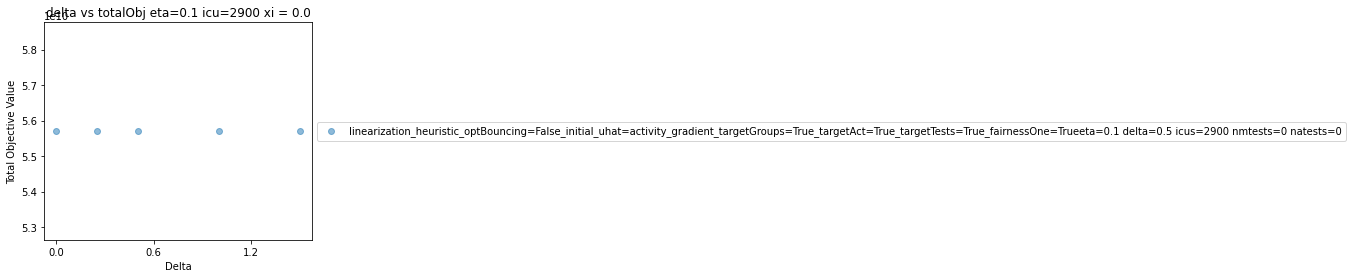

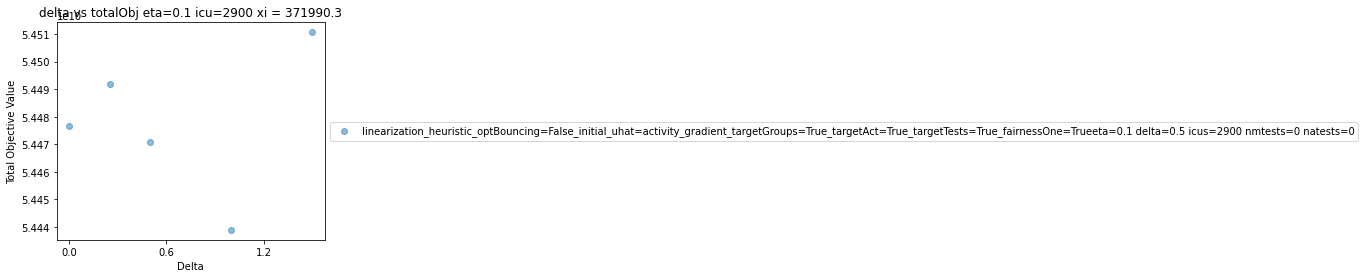

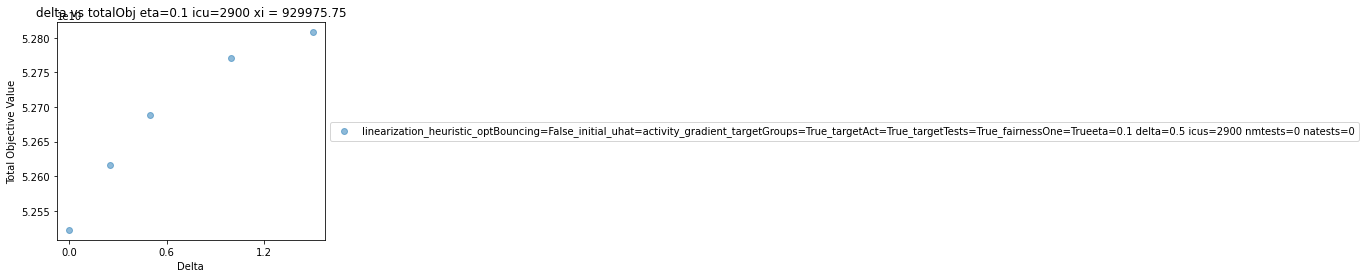

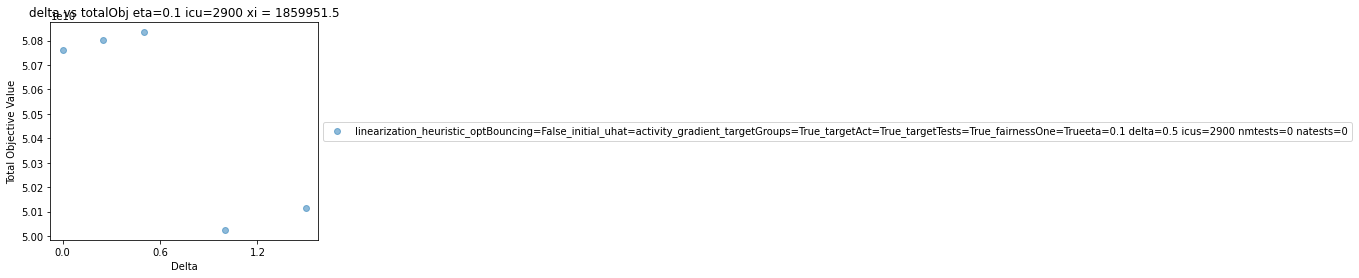

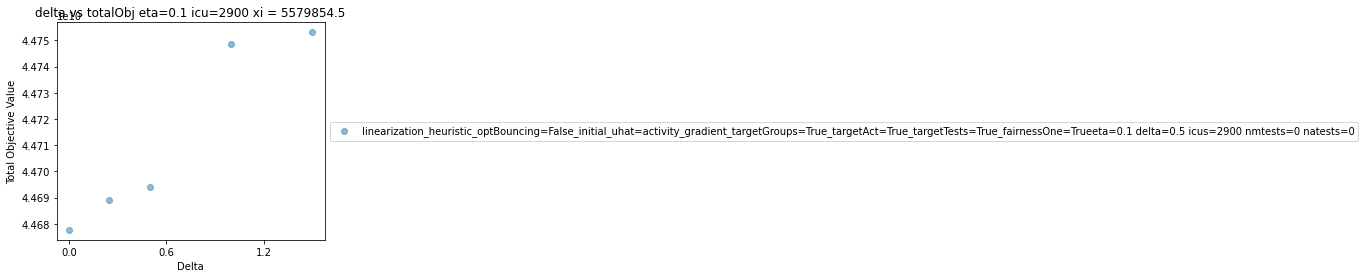

In [6]:
icus_to_try = [2900]
etas_to_try = [0.1]
nmtest_to_try = [0]
xi_mult_values = [0,10,25,50,150]
# 0,10,25,50,100,
xis_to_try = [mult * 37199.03 for mult in xi_mult_values]

for et in etas_to_try:
    for ic in icus_to_try:
        for n_test in nmtest_to_try:
            for xx in xis_to_try:

                etas = [et]
                deltas = [0.5]
                icus = [ic]
                lockdown_freq=14
                testing_freq=7
                nmtests = [n_test]
                natests = [0]

                heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True"]
                

                #  "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
                # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
                # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
                # ,"dynamic_gradient"]
                #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
                #  ["dynamic_gradient"]
                # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
                # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
                # ["dynamic_gradient"]
                # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

                # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

                fig1, ax1 = plt.subplots(1)
                box = ax1.get_position()
                ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                # Put a legend to the right of the current axis



                # fig2, ax2 = plt.subplots(1)
                # box = ax2.get_position()
                # ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])





                for h in heurs:
                    for e in etas:
                        for d in deltas:
                            for i in icus:
                                for nm in nmtests:
                                    for na in natests:
                                        all_deaths = []
                                        all_econ_values = []
                                        all_rewards = []
                                        all_deltaFair = []
                                        symbols = ["*",".","d","o","s","^"]
                                        
                                        for file_name in os.listdir(h):
                                            instance = file_name.split("_")

                                            for p in instance:
                                                if "xi" in p:
                                                    xi = float(p.split("-")[1])
                                    #                 print(xi)
                                                if "icus" in p:
                                                    icu = float(p.split("-")[1])
                                    #                 print(icu)
                                                if "natests" in p:
                                                    natest = float(p.split("-")[1])
                                    #                 print(natest)
                                                if "nmtests" in p:
                                                    nmtest = float(p.split("-")[1])
                                    #                 print(nmtest)
                                                if "dschool" in p:
                                                    delta = float(p.split("-")[1])
                                    #                 print(delta)
                                                if "eta" in p:
                                                    eta = float(p.split("-")[1])
                                    #                 print(eta)
                                                if "deltaFair" in p:
                                                    deltaFair = float(p.split("-")[1][:-5])
                                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and xi == xx :
                                                print(h)
                                                print(instance)
                                                
                                                with open("%s/%s"%(h,file_name)) as file:
                                                    result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                                # Read group parameters
                                                with open("../../parameters/fitted.yaml") as file:
                                                    universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/econ.yaml") as file:
                                                    econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read group parameters
                                                with open("../../parameters/one_group_fitted.yaml") as file:
                                                    universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/one_group_econ.yaml") as file:
                                                    econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                                start_day = result["experiment_params"]["start_day"]

                                                if result["groups"] == "one":
                                                    universe_params = universe_params_one
                                                    econ_params = econ_params_one

                                                    with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)

                                                elif result["groups"] == "all":
                                                    universe_params = universe_params_all
                                                    econ_params = econ_params_all

                                                    with open("../../initialization/oct21.yaml") as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)
                                                else:
                                                    assert(False)

                                                experiment_params = result["experiment_params"]

                                                dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                                for t in range(experiment_params["T"]):
                                                    dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                                dynModel.take_end_steps()

                                                deaths = dynModel.get_total_deaths()
                                                econ_value = dynModel.get_total_reward() + dynModel.get_total_deaths() * xi 
                                                reward = dynModel.get_total_reward()
                                                
                                                all_deaths.append(deaths)
                                                all_econ_values.append(econ_value)
                                                all_deltaFair.append(deltaFair)
                                                all_rewards.append(reward)
                                            
                                        print(all_rewards)
                                        # print(all_xis)
                                        print(all_deltaFair)
                                        ax1.scatter(all_deltaFair, all_rewards, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)

                                        # ax2.scatter(all_deaths, all_econ_values,label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)
                                        print(all_econ_values)
                                        print(all_deaths)
                            

                # for x,y in zip(all_deaths, all_econ_values):

                #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

                    # ax2.annotate(label, # this is the text
                    #                     (x,y), # this is the point to label
                    #                     textcoords="offset points", # how to position the text
                    #                     xytext=(0,10), # distance from text to points (x,y)
                    #                     ha='center') # horizontal alignment can be left, right or center

                ax1.set(ylabel='Total Objective Value')
                ax1.set(xlabel='Delta')
                ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

                # Put a legend to the right of the current axis
                ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

                ax1.set_title(f"delta vs totalObj eta={etas[0]} icu={icus[0]} xi = {xx}")
                fig1.savefig(f"plots/test_value_deltaFair_vs_totalObj_eta={etas[0]}_icu={icus[0]}_xi={xx}.pdf", bbox_inches='tight')



                # ax2.set(ylabel='Economic Value ($)')
                # ax2.set(xlabel='Total Number of deaths')


                # fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

                # ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
                # fig2.savefig(f"plots/test_value_deaths_vs_econValue_for_diffFairnessDelta_eta={etas[0]}_icu={icus[0]}_xi={xx}.pdf", bbox_inches='tight')
                            
            # for eta in etas:
            #     for delta in deltas:
            #         for icu in icus:
            #             for nmtest in nmtests:
            #                 for natest in natests:
            #                     for heur in heurs:

In [8]:
icus_to_try = [2900]
# ,2900,3200]
etas_to_try = [0.1]
# ,0.1,0.2]

for et in etas_to_try:
    for ic in icus_to_try:

        etas = [et]
        deltas = [0.5]
        icus = [ic]
        lockdown_freq=14
        testing_freq=7
        nmtests = [0,30000,60000,120000]
        natests = [0]

        heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=False", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"]
        # linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=False
        # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
        # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
        # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
        # ,"dynamic_gradient"]
        #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
        #  ["dynamic_gradient"]
        # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
        # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
        # ["dynamic_gradient"]
        # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

        # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        fig1, ax1 = plt.subplots(1)
        box = ax1.get_position()
        ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis



        fig2, ax2 = plt.subplots(1)
        box = ax2.get_position()
        ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])




        markers = [".","<",">","*","p","+","x","1"]
        marker = 0
        for h in heurs:
            for e in etas:
                for d in deltas:
                    for i in icus:
                        for nm in nmtests:
                            for na in natests:
                                all_deaths = []
                                all_econ_values = []
                                all_xis = []
                                all_rewards = []
                                symbols = ["*",".","d","o","s","^"]
                                
                                for file_name in os.listdir(h):
                                    instance = file_name.split("_")

                                    for p in instance:
                                        if "xi" in p:
                                            xi = float(p.split("-")[1])
                            #                 print(xi)
                                        if "icus" in p:
                                            icu = float(p.split("-")[1])
                            #                 print(icu)
                                        if "natests" in p:
                                            natest = float(p.split("-")[1])
                            #                 print(natest)
                                        if "nmtests" in p:
                                            nmtest = float(p.split("-")[1])
                            #                 print(nmtest)
                                        if "dschool" in p:
                                            delta = float(p.split("-")[1])
                            #                 print(delta)
                                        if "eta" in p:
                                            eta = float(p.split("-")[1])
                            #                 print(eta)
                                        if "T" in p:
                                            T = float(p.split("-")[1])
                            #                 print(eta)

                                    if eta == e and icu == i and nmtest == nm and natest == na and delta == d and T==90:
                                        print(h)
                                        print(instance)
                                        
                                        with open("%s/%s"%(h,file_name)) as file:
                                            result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                        # Read group parameters
                                        with open("../../parameters/fitted.yaml") as file:
                                            universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/econ.yaml") as file:
                                            econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read group parameters
                                        with open("../../parameters/one_group_fitted.yaml") as file:
                                            universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                        # Read econ parameters
                                        with open("../../parameters/one_group_econ.yaml") as file:
                                            econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                        start_day = result["experiment_params"]["start_day"]

                                        if result["groups"] == "one":
                                            universe_params = universe_params_one
                                            econ_params = econ_params_one

                                            with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)

                                        elif result["groups"] == "all":
                                            universe_params = universe_params_all
                                            econ_params = econ_params_all

                                            with open("../../initialization/oct21.yaml") as file:
                                                initialization = yaml.load(file, Loader=yaml.FullLoader)
                                        else:
                                            assert(False)

                                        experiment_params = result["experiment_params"]

                                        dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                        for t in range(experiment_params["T"]):
                                            dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                        dynModel.take_end_steps()

                                        deaths = dynModel.get_total_deaths()
                                        econ_value = dynModel.get_total_reward() + dynModel.get_total_deaths() * xi 
                                        reward = dynModel.get_total_reward()
                                        
                                        all_deaths.append(deaths)
                                        all_econ_values.append(econ_value)
                                        all_xis.append(xi/37199.03)
                                        all_rewards.append(reward)
                                    
                                
                                all_rewards = [x for _, x in sorted(zip(all_xis, all_rewards))]
                                all_deaths = [x for _, x in sorted(zip(all_xis, all_deaths))]
                                all_econ_values = [x for _, x in sorted(zip(all_xis, all_econ_values))]
                                all_xis = sorted(all_xis)

                                print(all_rewards)
                                print(all_xis)
                                ax1.scatter(all_xis, all_rewards, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5,marker=markers[marker], color=["r","g","b", "c","m","y"])

                                ax2.scatter(all_deaths, all_econ_values,label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5,marker=markers[marker], color=["r","g","b", "c","m","y"])

                                marker+=1

                                print(all_econ_values)
                                print(all_deaths)
                    

        # for x,y in zip(all_deaths, all_econ_values):

        #     label = "{:.2f}".format(all_xis[all_deaths.index(x)])

            # ax2.annotate(label, # this is the text
            #                     (x,y), # this is the point to label
            #                     textcoords="offset points", # how to position the text
            #                     xytext=(0,10), # distance from text to points (x,y)
            #                     ha='center') # horizontal alignment can be left, right or center

        ax1.set(ylabel='Total Objective Value')
        ax1.set(xlabel='Xi')
        ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

        # Put a legend to the right of the current axis
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax1.set_title(f"xi vs totalObj eta={etas[0]} icu={icus[0]}")
        fig1.savefig(f"plots/simple_xi_vs_totalObj_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')



        ax2.set(ylabel='Economic Value ($)')
        ax2.set(xlabel='Total Number of deaths')


        fig2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        ax2.set_title(f"deaths vs econ eta={etas[0]} icu={icus[0]}")
        fig2.savefig(f"plots/simple_deaths_vs_econValue_eta={etas[0]}_icu={icus[0]}.pdf", bbox_inches='tight')
                    
        # for eta in etas:
        #     for delta in deltas:
        #         for icu in icus:
        #             for nmtest in nmtests:
        #                 for natest in natests:
        #                     for heur in heurs:
                                
                            



linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=False
['xi-5579854.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=False
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=False
['xi-3719903.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
linearization_heuristic_o

ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 0.